In [1]:
import pandas as pd

## Make dataframes out of csv files from NFI
file_site_cla = "../data/raw/nfi/site_cla.csv"
file_stand_waa = "../data/raw/nfi/stand_waa.csv"
file_tree_baa = "../data/raw/nfi/tree_baa.csv"



df_site_cla = pd.read_csv(file_site_cla)
df_stand_waa = pd.read_csv(file_stand_waa)
df_tree_baa = pd.read_csv(file_tree_baa)

print("--- site_cla.csv ---")
print(df_site_cla.head()) 
print(f"Shape: {df_site_cla.shape}\n") 

print("--- stand_waa.csv ---")
print(df_stand_waa.head())
print(f"Shape: {df_stand_waa.shape}\n")

print("--- tree_baa.csv ---")
print(df_tree_baa.head())
print(f"Shape: {df_tree_baa.shape}\n")





--- site_cla.csv ---
        CLNR         X         Y    ASPECT25    SLOPE25    Z25    PH  GWL3  \
0    1     4  685000.0  295000.0  172.848160  39.759354  735.9  7.01  3324   
1    2     6  686000.0  295000.0  104.901916  31.302792  744.3  7.21  5217   
2    3     7  687000.0  295000.0  125.188889  28.632330  715.4   NaN  3339   
3    4     9  688000.0  295000.0  152.808624  26.588442  730.6   NaN  3818   
4    5    10  691000.0  295000.0   25.997786  11.292724  612.1  3.95  4730   

   NAISHSTKOMB  NAISHSTKOMB3KL  NAISWFORM20  
0            5               2           -1  
1            5               2            1  
2            5               2           -1  
3            5               2           -1  
4            4               2           -1  
Shape: (41279, 12)

--- stand_waa.csv ---
        CLNR  INVNR  BASFPH  BESTALTKLA20  BFANTNDHKLA  DDOM  BEWIRTINT1  EST  \
0    1     6    150   23.85             6            1  45.2           1    3   
1    2     6    250   48.99   

In [2]:
# take the desired columns of stand_waa

desired_columns = ["CLNR", "DATUMF","INVNR","BASFPH","BEWIRTINT1"]

stand_df = df_stand_waa[desired_columns].copy()

print(stand_df.head())
print(f"Shape: {stand_df.shape}\n")
# some statistics on BASFPH
print("BASFPH statistics:")
print(stand_df["BASFPH"].describe())

   CLNR      DATUMF  INVNR  BASFPH  BEWIRTINT1
0     6  16.04.1984    150   23.85           1
1     6  19.10.1994    250   48.99           2
2     6  01.11.2005    350   37.91           1
3     6  24.04.2015    450   15.73           1
4     6  23.10.2024    550   12.09          -1
Shape: (20820, 5)

BASFPH statistics:
count    20820.000000
mean        31.877350
std         19.672473
min          0.000000
25%         18.220000
50%         30.120000
75%         42.910000
max        336.360000
Name: BASFPH, dtype: float64


In [3]:
# Filter the stand_df for rows where BASFPH is 0
zero_basfph_df = stand_df[stand_df['BASFPH'] == 0]

# Display the first 10 records with CLNR and INVNR where BASFPH is 0
print("--- Overview of plots (CLNR) and inventories (INVNR) with BASFPH = 0 ---")
print(zero_basfph_df[['CLNR', 'INVNR', 'BASFPH']].head(10))

# Show the total count, which should match your previous calculation
print(f"\nTotal number of records with BASFPH = 0: {len(zero_basfph_df)}")

# Show the distribution of these zero-value records across different inventories
print("\n--- Distribution of records with BASFPH = 0 by INVNR ---")
print(zero_basfph_df['INVNR'].value_counts().sort_index())

#number of unique CLNR values with BASFPH = 0
unique_clnr_count = zero_basfph_df['CLNR'].nunique()
print(f"\nNumber of unique CLNR values with BASFPH = 0: {unique_clnr_count}")

--- Overview of plots (CLNR) and inventories (INVNR) with BASFPH = 0 ---
     CLNR  INVNR  BASFPH
30    151    150     0.0
34    151    550     0.0
80    448    150     0.0
135   636    150     0.0
136   636    250     0.0
201  1178    250     0.0
202  1178    350     0.0
208  1182    450     0.0
215  1194    150     0.0
231  1218    250     0.0

Total number of records with BASFPH = 0: 530

--- Distribution of records with BASFPH = 0 by INVNR ---
INVNR
150    131
250    111
350    120
450     99
550     69
Name: count, dtype: int64

Number of unique CLNR values with BASFPH = 0: 357


In [4]:
# how many rows with bewirtint1 = 1
bewirtint1_count = stand_df[stand_df['BEWIRTINT1'] == 2].shape[0]
print(f"\nNumber of rows with BEWIRTINT1 = 1: {bewirtint1_count}")


Number of rows with BEWIRTINT1 = 1: 3208


In [5]:
df_site_cla["CLNR"].duplicated().any() #Check for duplicates in CLNR in df_site_cla

np.False_

In [6]:
desired_columns = ["CLNR","ASPECT25", "SLOPE25","PH","Z25","X","Y","NAISHSTKOMB"]

site_df = df_site_cla[desired_columns].copy()

print(site_df.head())
print(f"Shape: {site_df.shape}\n")

   CLNR    ASPECT25    SLOPE25    PH    Z25         X         Y  NAISHSTKOMB
0     4  172.848160  39.759354  7.01  735.9  685000.0  295000.0            5
1     6  104.901916  31.302792  7.21  744.3  686000.0  295000.0            5
2     7  125.188889  28.632330   NaN  715.4  687000.0  295000.0            5
3     9  152.808624  26.588442   NaN  730.6  688000.0  295000.0            5
4    10   25.997786  11.292724  3.95  612.1  691000.0  295000.0            4
Shape: (41279, 8)



In [7]:
#combine stand_df with df_site_cla
#Cmd + Shift + Space for function info

stand_site_df = pd.merge(left=stand_df, right = site_df, how= "left") #left join because the site_df also contains CLNR from non forest patches. merge on CLNR

print(stand_site_df.head())
print(f"Shape: {stand_site_df.shape}\n")

   CLNR      DATUMF  INVNR  BASFPH  BEWIRTINT1    ASPECT25    SLOPE25    PH  \
0     6  16.04.1984    150   23.85           1  104.901916  31.302792  7.21   
1     6  19.10.1994    250   48.99           2  104.901916  31.302792  7.21   
2     6  01.11.2005    350   37.91           1  104.901916  31.302792  7.21   
3     6  24.04.2015    450   15.73           1  104.901916  31.302792  7.21   
4     6  23.10.2024    550   12.09          -1  104.901916  31.302792  7.21   

     Z25         X         Y  NAISHSTKOMB  
0  744.3  686000.0  295000.0            5  
1  744.3  686000.0  295000.0            5  
2  744.3  686000.0  295000.0            5  
3  744.3  686000.0  295000.0            5  
4  744.3  686000.0  295000.0            5  
Shape: (20820, 12)



In [8]:
#Check for nan

columns_with_nan = stand_site_df.isnull().any()

print("\nColumns containing NaN values:")
print(columns_with_nan[columns_with_nan == True].index.tolist()) #  print the names of the columns with NaN values


nan_counts_per_column = stand_site_df.isnull().sum()

print("\nNumber of NaN values per column:")
print(nan_counts_per_column[nan_counts_per_column > 0])

#summary of CLNR and INVNR of the rows conatining naN values
nan_rows = stand_site_df[stand_site_df.isnull().any(axis=1)][["CLNR", "INVNR"]]
print("\nRows with NaN values in any column:")
print(nan_rows)
#how many differnt CLNR are there?
print(f"\nNumber of different CLNR with NaN values: {nan_rows['CLNR'].nunique()}")
#77 *5 = 385. So every CLNR that has one nan, has a nan in each invnr

# we remove all rows with NaN values in any column
stand_site_df = stand_site_df.dropna()
print(stand_site_df.shape)



Columns containing NaN values:
['ASPECT25', 'PH']

Number of NaN values per column:
ASPECT25      5
PH          380
dtype: int64

Rows with NaN values in any column:
         CLNR  INVNR
1120     8030    150
1121     8030    250
1122     8030    350
1123     8030    450
1124     8030    550
...       ...    ...
19630  153527    150
19631  153527    250
19632  153527    350
19633  153527    450
19634  153527    550

[385 rows x 2 columns]

Number of different CLNR with NaN values: 77
(20435, 12)


In [9]:
#df_tree_baa preprocessing

# bei der variable BASFPH bei df_stand_waa zàhlen werden nur stehende lebende Bàume gezàhlt. Bàume die sthen (IPOPSTE==1 ) und IPOPLEB ==-1 (nicht gemessen) werden auch gezàhlt. the other case IPOPSTE ==-1 and IPOPLEB == 1 doesnt exist.

mask_alive_and_standing = ((df_tree_baa['IPOPLEB'] == 1) | (df_tree_baa['IPOPLEB'] == -1)) & (df_tree_baa['IPOPSTE'] == 1) 
df_alive_standing_trees = df_tree_baa[mask_alive_and_standing].copy() 

print("--- Alive and Standing Trees (df_alive_standing_trees) ---")
print(df_alive_standing_trees.head())
print(f"Shape of alive and standing trees: {df_alive_standing_trees.shape}\n")


--- Alive and Standing Trees (df_alive_standing_trees) ---
        CLNR   BANR  INVNR  BART  D13      BASF    BAL  RPSTZ  IPOPBAUM  \
0    1     4  79312    150    50   16  0.020106  14.22   50.0         1   
1    2     4  79313    150    10   21  0.034636   7.37   50.0         1   
2    3     4  79314    150    10   20  0.031416   9.10   50.0         1   
3    4     4  79315    150    10   17  0.022698  11.95   50.0         1   
4    5     4  79316    150    10   13  0.013273  17.00   50.0         1   

   IPOPLEB  IPOPTOT  IPOPLIE  IPOPSTE  
0       -1       -1        0        1  
1       -1       -1        0        1  
2       -1       -1        0        1  
3       -1       -1        0        1  
4       -1       -1        0        1  
Shape of alive and standing trees: (385309, 14)



In [10]:
# take the desired columns of tree_baa
desired_columns = ["CLNR","BANR","INVNR","BART","BASF","RPSTZ"]

tree_df_prefiltered = df_alive_standing_trees[desired_columns].copy()

print(tree_df_prefiltered.head())
print(f"Shape: {tree_df_prefiltered.shape}\n")

   CLNR   BANR  INVNR  BART      BASF  RPSTZ
0     4  79312    150    50  0.020106   50.0
1     4  79313    150    10  0.034636   50.0
2     4  79314    150    10  0.031416   50.0
3     4  79315    150    10  0.022698   50.0
4     4  79316    150    10  0.013273   50.0
Shape: (385309, 6)



In [11]:
# delete unnecessary rows in df_tree_baa
valid_clnrs = stand_site_df['CLNR'].unique()
print(f"Number of unique CLNRs in stand_site_df: {len(valid_clnrs)}")

tree_df = tree_df_prefiltered[tree_df_prefiltered['CLNR'].isin(valid_clnrs)].copy() #df[boolean series] => outputs rows in df that are True

print(tree_df.head())
print(f"Shape of original df_tree_baa: {tree_df_prefiltered.shape}")
print(f"Shape of filtered df_tree_baa: {tree_df.shape}\n")

Number of unique CLNRs in stand_site_df: 4087
    CLNR   BANR  INVNR  BART      BASF  RPSTZ
16     6  79831    150    50  0.080425   50.0
17     6  79832    150    60  0.246301   20.0
18     6  79833    150    50  0.070686   50.0
19     6  79834    150    50  0.125664   20.0
20     6  79835    150    50  0.159043   20.0
Shape of original df_tree_baa: (385309, 6)
Shape of filtered df_tree_baa: (232510, 6)



In [12]:
#Check for nan in tree_df

columns_with_nan = tree_df.isnull().any()

print("\nColumns containing NaN values:")
print(columns_with_nan[columns_with_nan == True].index.tolist())




Columns containing NaN values:
[]


In [13]:
#create new column BASFPHS in tree_df. BASFPHS = Basal area per hectare of a tree species
tree_df['BASFPHS'] = tree_df['BASF'] * tree_df['RPSTZ']

print(tree_df.head())
print(f"Shape of tree_df: {tree_df.shape}\n") 

print("Data types of relevant columns:")
print(tree_df[['BASF', 'RPSTZ', 'BASFPHS']].dtypes)

    CLNR   BANR  INVNR  BART      BASF  RPSTZ   BASFPHS
16     6  79831    150    50  0.080425   50.0  4.021238
17     6  79832    150    60  0.246301   20.0  4.926017
18     6  79833    150    50  0.070686   50.0  3.534292
19     6  79834    150    50  0.125664   20.0  2.513274
20     6  79835    150    50  0.159043   20.0  3.180863
Shape of tree_df: (232510, 7)

Data types of relevant columns:
BASF       float64
RPSTZ      float64
BASFPHS    float64
dtype: object


In [14]:
#one row should represent one species per plot per inventory

# Define the columns to group by
grouping_cols = ['CLNR', 'INVNR', 'BART']

# Group by these columns and sum the 'BASFPHS' for each group
# We also keep the grouping columns as regular columns using .reset_index()
aggregated_tree_df = tree_df.groupby(grouping_cols)['BASFPHS'].sum().reset_index()

print("--- Aggregated tree_df ---")
print(aggregated_tree_df.head(10))
print(f"Shape of aggregated_tree_df: {aggregated_tree_df.shape}\n")



--- Aggregated tree_df ---
   CLNR  INVNR  BART    BASFPHS
0     6    150    50  18.924954
1     6    150    60   4.926017
2     6    250    15   6.560779
3     6    250    50  41.150547
4     6    250    81   1.276968
5     6    350    15   6.560779
6     6    350    50  29.078607
7     6    350    81   2.270166
8     6    450    15   7.761087
9     6    450    50   7.964777
Shape of aggregated_tree_df: (50926, 4)



In [15]:
#categorize for softwood and hardwood
 #softwood = nadelbäume un hardwood = laubbäume quelle: https://www.dora.lib4ri.ch/wsl/islandora/object/wsl%3A23637/datastream/PDF/D%C3%BCggelin-2020-Schweizerisches_Landesforstinventar._Anleitung_f%C3%BCr_die-%28published_version%29.pdf
softwood_codes = [11, 30, 31, 32, 33, 146, 147, 34, 10, 35, 19, 18, 16, 36, 17, 15, 22, 37, 25, 38, 39]

hardwood_codes = [301, 56, 302, 59, 57, 58, 89, 161, 63, 64, 65, 66, 67, 62, 68, 162, 322, 50, 60, 61, 69, 90, 324, 71, 70, 303, 163, 150, 74, 76, 75, 149, 77, 321, 72, 54, 52, 53, 51, 55, 191, 78, 79, 152, 80, 81, 82, 83, 159, 158, 84, 85, 86, 88, 160, 87]
def get_wood_type(bart_code):
    if bart_code in softwood_codes:
        return 'SW'
    elif bart_code in hardwood_codes:
        return 'HW'

aggregated_tree_df['Wood_Type'] = aggregated_tree_df['BART'].apply(get_wood_type)

print("--- aggregated_tree_df with Wood_Type ---")
print(aggregated_tree_df.head())
print(f"Shape: {aggregated_tree_df.shape}\n")

--- aggregated_tree_df with Wood_Type ---
   CLNR  INVNR  BART    BASFPHS Wood_Type
0     6    150    50  18.924954        HW
1     6    150    60   4.926017        HW
2     6    250    15   6.560779        SW
3     6    250    50  41.150547        HW
4     6    250    81   1.276968        HW
Shape: (50926, 5)



In [16]:
# 1. Group by CLNR, INVNR, and Wood_Type, and sum the BASFPHS.
basfphs_sum_by_wood_type = aggregated_tree_df.groupby(['CLNR', 'INVNR', 'Wood_Type'])['BASFPHS'].sum().reset_index() #agregate the HW and SW so per CLNR and INVNR we dont have multiple rows for SW or HW

# 2. Pivot this table to make Wood_Type categories into columns
pivoted_wood_types = basfphs_sum_by_wood_type.pivot_table(
    index=['CLNR', 'INVNR'],
    columns='Wood_Type',
    values='BASFPHS',
    fill_value=0 # Fill NaN values with 0
).reset_index()

pivoted_wood_types.columns.name = None # Remove the name of the column index

print(pivoted_wood_types.head())
print(f"Shape: {pivoted_wood_types.shape}\n")


   CLNR  INVNR         HW        SW
0     6    150  23.850971  0.000000
1     6    250  42.427515  6.560779
2     6    350  31.348772  6.560779
3     6    450   7.964777  7.761087
4     6    550   7.908726  4.183128
Shape: (19721, 4)



In [17]:
pivoted_wood_types["BASFPH_calculated"] =pivoted_wood_types["HW"] + pivoted_wood_types["SW"]


print(pivoted_wood_types.head(20))

print(f"Shape: {pivoted_wood_types.shape}")

    CLNR  INVNR         HW         SW  BASFPH_calculated
0      6    150  23.850971   0.000000          23.850971
1      6    250  42.427515   6.560779          48.988294
2      6    350  31.348772   6.560779          37.909552
3      6    450   7.964777   7.761087          15.725865
4      6    550   7.908726   4.183128          12.091854
5     26    150  17.842674  12.272632          30.115306
6     26    250  14.507875  12.272632          26.780507
7     26    350  21.496348   0.000000          21.496348
8     26    450  25.433549   0.000000          25.433549
9     26    550  28.765993   0.000000          28.765993
10    47    150  25.038493  38.584255          63.622748
11    47    250  25.894577  32.604234          58.498811
12    47    350  22.889644  35.093946          57.983590
13    47    450  21.696624  24.346558          46.043182
14    47    550  17.600774  20.523240          38.124013
15    51    150  17.624334  10.165408          27.789743
16    51    250  21.414667  13.

In [18]:
# merge with stand site df but they have not the same shape. chek the not matching rows

# Create a unique identifier for plot-inventories in both dataframes
stand_site_df['plot_inv_id'] = stand_site_df['CLNR'].astype(str) + "_" + stand_site_df['INVNR'].astype(str)
pivoted_wood_types['plot_inv_id'] = pivoted_wood_types['CLNR'].astype(str) + "_" + pivoted_wood_types['INVNR'].astype(str)

# Get the set of IDs from both
ids_in_stand_site = set(stand_site_df['plot_inv_id'])
ids_in_pivoted = set(pivoted_wood_types['plot_inv_id'])

# Find IDs in stand_site_df but not in pivoted_wood_types. There are only missing vlues in one direction
missing_ids_from_pivoted =  ids_in_stand_site - ids_in_pivoted # the other way are 0 values

print(f"Number of plot-inventories in stand_site_df: {len(ids_in_stand_site)}")
print(f"Number of plot-inventories in pivoted_wood_types: {len(ids_in_pivoted)}")
print(f"Number of plot-inventories in stand_site_df but NOT in pivoted_wood_types: {len(missing_ids_from_pivoted)}")

# Let's look at some of these missing plot-inventories in stand_site_df
# We expect their BASFPH (from stand_waa) to be 0 or very low.

missing_plot_inventories_df = stand_site_df[stand_site_df['plot_inv_id'].isin(missing_ids_from_pivoted)]
print("\n--- Details of plot-inventories present in stand_site_df but missing from pivoted_wood_types ---")
print(missing_plot_inventories_df.head())
print(f"Shape of missing_plot_inventories_df: {missing_plot_inventories_df.shape}")
print("\nBASFPH values for these missing plot-inventories (from stand_waa):")
print(missing_plot_inventories_df['BASFPH'].describe())

#BASFPH values are 0 in alle these cases. so there is no tree data for these plots. We have to delete these rows in the stand_site_df

#drop plot_inv_id
stand_site_df.drop(columns=['plot_inv_id'], inplace=True)
pivoted_wood_types.drop(columns=['plot_inv_id'], inplace=True)


Number of plot-inventories in stand_site_df: 20435
Number of plot-inventories in pivoted_wood_types: 19721
Number of plot-inventories in stand_site_df but NOT in pivoted_wood_types: 714

--- Details of plot-inventories present in stand_site_df but missing from pivoted_wood_types ---
     CLNR      DATUMF  INVNR  BASFPH  BEWIRTINT1    ASPECT25    SLOPE25    PH  \
30    151  18.03.1985    150     0.0           1  325.784515   4.534816  3.50   
34    151  30.03.2021    550     0.0           1  325.784515   4.534816  3.50   
80    448  29.03.1984    150     0.0           1  256.538849  19.331051  7.03   
135   636  23.03.1984    150     0.0           1  306.273499  47.072559  6.91   
136   636  15.03.1994    250     0.0           1  306.273499  47.072559  6.91   

       Z25         X         Y  NAISHSTKOMB plot_inv_id  
30   649.0  692000.0  291000.0            7     151_150  
34   649.0  692000.0  291000.0            7     151_550  
80   570.1  680000.0  287000.0            7     448_150

In [19]:
# --- Creating the final NFI data frame ---

print(f"Shape of stand_site_df before merge: {stand_site_df.shape}")
print(f"Shape of pivoted_wood_types before merge: {pivoted_wood_types.shape}")

# An 'inner' join is the most direct way to keep only the rows that match in both dataframes.
# It automatically handles the filtering you were doing manually.
NFI_df = pd.merge(
    left=stand_site_df,
    right=pivoted_wood_types,
    on=['CLNR', 'INVNR'],
    how='inner'
)

print("\n--- Final Merged DataFrame ---")
print(NFI_df.head(10))
print(f"Shape of final NFI_df: {NFI_df.shape}\n")

    

Shape of stand_site_df before merge: (20435, 12)
Shape of pivoted_wood_types before merge: (19721, 5)

--- Final Merged DataFrame ---
   CLNR      DATUMF  INVNR  BASFPH  BEWIRTINT1    ASPECT25    SLOPE25    PH  \
0     6  16.04.1984    150   23.85           1  104.901916  31.302792  7.21   
1     6  19.10.1994    250   48.99           2  104.901916  31.302792  7.21   
2     6  01.11.2005    350   37.91           1  104.901916  31.302792  7.21   
3     6  24.04.2015    450   15.73           1  104.901916  31.302792  7.21   
4     6  23.10.2024    550   12.09          -1  104.901916  31.302792  7.21   
5    26  10.04.1984    150   30.12           1  345.627380  16.516918  6.44   
6    26  19.10.1994    250   26.78           1  345.627380  16.516918  6.44   
7    26  01.11.2005    350   21.50           1  345.627380  16.516918  6.44   
8    26  07.04.2010    450   25.43           1  345.627380  16.516918  6.44   
9    26  08.05.2018    550   28.77           1  345.627380  16.516918  6.44 

In [20]:
STRICTER_METHOD = False

if STRICTER_METHOD:

    # --- Stricter Method: Remove entire CLNR if any inventory is missing ---

    # 2. From these missing IDs, get the list of unique CLNRs that are "contaminated"
    missing_clnrs_df = stand_site_df[stand_site_df['plot_inv_id'].isin(missing_ids_from_pivoted)]
    clnrs_to_remove = missing_clnrs_df['CLNR'].unique()

    print(f"Found {len(clnrs_to_remove)} CLNRs with at least one missing inventory. These plots will be removed entirely.")

    # 3. Filter stand_site_df to REMOVE all rows belonging to these CLNRs
    stand_site_df_filtered = stand_site_df[~stand_site_df['CLNR'].isin(clnrs_to_remove)].copy()

    # 4. Now, perform the merge on the pre-filtered data
    #    (We can drop the temporary ID column first)
    stand_site_df_filtered.drop(columns='plot_inv_id', inplace=True)
    pivoted_wood_types.drop(columns='plot_inv_id', inplace=True)

    NFI_df_strict = pd.merge(
        stand_site_df_filtered,
        pivoted_wood_types,
        on=['CLNR', 'INVNR'],
        how='inner' # Inner join is still safest
    )

    print("\n--- Final Merged DataFrame (Strict Method) ---")
    print(f"Shape of final NFI_df_strict: {NFI_df_strict.shape}\n")

In [21]:
# --- Comparison of BASFPH and BASFPH_calculated ---

print("\n--- Comparing BASFPH (from stand_waa) with BASFPH_calculated (from tree_baa) ---")

# We round BASFPH_calculated to 2 decimal places for a fair comparison with BASFPH.
NFI_df['BASFPH_calculated_rounded'] = NFI_df['BASFPH_calculated'].round(2)

# Calculate the absolute difference
NFI_df['difference'] = (NFI_df['BASFPH'] - NFI_df['BASFPH_calculated_rounded']).abs()

# --- Overall Mismatch Summary ---
total_rows = len(NFI_df)
mismatched_rows_df = NFI_df[NFI_df['difference'] > 0.001] # Use a small threshold to avoid float precision issues
num_mismatches = len(mismatched_rows_df)
num_matches = total_rows - num_mismatches

print(f"Total rows compared: {total_rows}")
print(f"Number of matching rows: {num_matches}")
print(f"Number of mismatched rows: {num_mismatches}")
if total_rows > 0:
    print(f"Mismatch rate: {num_mismatches/total_rows:.2%}")


# --- Focused Analysis on Large Mismatches (Difference > 1.0) ---
print("\n--- Analyzing Large Mismatches (Absolute Difference > 1.0) ---")

# Isolate only the rows with a significant difference
large_mismatch_df = NFI_df[NFI_df['difference'] > 1.0].copy()

print(f"\nFound {len(large_mismatch_df)} rows where the absolute difference is > 1.0.")

if not large_mismatch_df.empty:
    # Display the top 20 largest differences to see "how big" they can be
    print("\nTop 20 largest mismatches (sorted by difference):")
    display_cols = ['CLNR', 'INVNR', 'BASFPH', 'BASFPH_calculated', 'difference']
    print(large_mismatch_df[display_cols].sort_values('difference', ascending=False).head(20))

    # Provide summary statistics specifically for this subset of large differences
    print("\nStatistics for these large differences (>1.0):")
    print(large_mismatch_df['difference'].describe())

    # Analyze the distribution of these large mismatches by inventory number
    print("\nNumber of large mismatches (>1.0) per INVNR:")
    print(large_mismatch_df['INVNR'].value_counts())
    
    # Drop the temporary columns used for comparison
    NFI_df.drop(columns=['BASFPH_calculated_rounded'], inplace=True)
    NFI_df.drop(columns=['difference'], inplace=True)
    
else:
    print("No mismatches with a difference greater than 1.0 were found.")

#drop the BASFPH_calculated column as it is not needed anymore
NFI_df.drop(columns=['BASFPH_calculated'], inplace=True)


--- Comparing BASFPH (from stand_waa) with BASFPH_calculated (from tree_baa) ---
Total rows compared: 19721
Number of matching rows: 17818
Number of mismatched rows: 1903
Mismatch rate: 9.65%

--- Analyzing Large Mismatches (Absolute Difference > 1.0) ---

Found 1543 rows where the absolute difference is > 1.0.

Top 20 largest mismatches (sorted by difference):
         CLNR  INVNR  BASFPH  BASFPH_calculated  difference
18370  152068    250   75.37           8.169329       67.20
18369  152068    150   71.36           5.492460       65.87
17666  147290    250   66.33           2.724514       63.61
14195  112307    250   57.08           1.417643       55.66
10609   77386    150   60.97          11.224911       49.75
14194  112307    150   53.63           4.060509       49.57
10774   78580    250   54.92           7.744026       47.18
18801  155343    250   51.42           6.440265       44.98
18388  152140    250   47.38           2.905973       44.47
18266  151485    250   52.74       

In [22]:
# Add BASFPH from the next INVNR

NFI_df.sort_values(by=['CLNR', 'INVNR'], inplace=True)

NFI_df['BASFPH_next_INVNR'] = NFI_df.groupby('CLNR')['BASFPH'].shift(-1)

print("\n--- NFI_df with BASFPH from next INVNR (first 15 rows) ---")
print(NFI_df[['CLNR', 'INVNR', 'BASFPH', 'BASFPH_next_INVNR']].head(15))

NFI_df["BASFPH_difference"] = NFI_df["BASFPH"] - NFI_df["BASFPH_next_INVNR"]

NFI_df.shape


--- NFI_df with BASFPH from next INVNR (first 15 rows) ---
    CLNR  INVNR  BASFPH  BASFPH_next_INVNR
0      6    150   23.85              48.99
1      6    250   48.99              37.91
2      6    350   37.91              15.73
3      6    450   15.73              12.09
4      6    550   12.09                NaN
5     26    150   30.12              26.78
6     26    250   26.78              21.50
7     26    350   21.50              25.43
8     26    450   25.43              28.77
9     26    550   28.77                NaN
10    47    150   63.62              58.50
11    47    250   58.50              57.98
12    47    350   57.98              46.04
13    47    450   46.04              38.12
14    47    550   38.12                NaN


(19721, 16)

In [23]:
import numpy as np
# Calculate proportions of hardwood and softwood
total_wood = NFI_df["HW"] + NFI_df["SW"]
NFI_df['HWSW_prop'] = np.divide(NFI_df['HW'], total_wood)
NFI_df['HWSW_prop'].fillna(0.5, inplace=True) # If both HW and SW are 0, assume a neutral 0.5 proportion. 0 cases

#Create the Second Target Variable

# Sort by plot and inventory year to ensure the 'next' value is correct
NFI_df.sort_values(by=['CLNR', 'INVNR'], inplace=True) 

# Group by plot (CLNR) and shift the 'HWSW_prop' value up by one row
# This brings the value from the next inventory period to the current row
NFI_df['HWSW_prop_next_INVNR'] = NFI_df.groupby('CLNR')['HWSW_prop'].shift(-1) #we do groupby to ensure we only shift within each plot

# The last entry for each plot will have a NaN for this new column, which is expected.
# We will drop these rows in the next step.
print("New target column created.")
print("Example of a single plot (CLNR) to verify:")
print(NFI_df[NFI_df['CLNR'] == 6][['CLNR', 'INVNR', 'HWSW_prop', 'HWSW_prop_next_INVNR']])

NFI_df.shape

New target column created.
Example of a single plot (CLNR) to verify:
   CLNR  INVNR  HWSW_prop  HWSW_prop_next_INVNR
0     6    150   1.000000              0.866075
1     6    250   0.866075              0.826936
2     6    350   0.826936              0.506476
3     6    450   0.506476              0.654054
4     6    550   0.654054                   NaN


/var/folders/8v/8ysgj2ts3wndnfw8s60082cw0000gn/T/ipykernel_94160/3381067973.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NFI_df['HWSW_prop'].fillna(0.5, inplace=True) # If both HW and SW are 0, assume a neutral 0.5 proportion. 0 cases


(19721, 18)

In [24]:
# Add Time Difference between current and next INVNR and add year of inventory

NFI_df.sort_values(by=['CLNR', 'INVNR'], inplace=True)

# 1. Convert DATUMF to datetime objects
NFI_df['DATUMF_dt'] = pd.to_datetime(NFI_df['DATUMF'], format='%d.%m.%Y', errors='coerce')

NFI_df['INVYR'] = NFI_df['DATUMF_dt'].dt.year
# 2. Create a new column for the datetime of the next inventory
NFI_df['DATUMF_next_INVNR_dt'] = NFI_df.groupby('CLNR')['DATUMF_dt'].shift(-1)

# 3. Calculate the time difference using the two datetime columns
NFI_df['Time_Diff_next_INVNR'] = NFI_df['DATUMF_next_INVNR_dt'] - NFI_df['DATUMF_dt']

# Convert the Timedelta to a more readable format
NFI_df['Time_Diff_days'] = NFI_df['Time_Diff_next_INVNR'].dt.days
NFI_df['Time_Diff_years'] = NFI_df['Time_Diff_next_INVNR'].dt.days / 365.25

#round Time_Diff_years to full years
NFI_df['Time_Diff_years'] = NFI_df['Time_Diff_years'].round()

NFI_df.drop(columns=['DATUMF_dt', 'DATUMF_next_INVNR_dt','Time_Diff_next_INVNR','Time_Diff_days'], inplace=True, errors='ignore')

In [25]:
print(NFI_df.head())
print(NFI_df.columns)

   CLNR      DATUMF  INVNR  BASFPH  BEWIRTINT1    ASPECT25    SLOPE25    PH  \
0     6  16.04.1984    150   23.85           1  104.901916  31.302792  7.21   
1     6  19.10.1994    250   48.99           2  104.901916  31.302792  7.21   
2     6  01.11.2005    350   37.91           1  104.901916  31.302792  7.21   
3     6  24.04.2015    450   15.73           1  104.901916  31.302792  7.21   
4     6  23.10.2024    550   12.09          -1  104.901916  31.302792  7.21   

     Z25         X         Y  NAISHSTKOMB         HW        SW  \
0  744.3  686000.0  295000.0            5  23.850971  0.000000   
1  744.3  686000.0  295000.0            5  42.427515  6.560779   
2  744.3  686000.0  295000.0            5  31.348772  6.560779   
3  744.3  686000.0  295000.0            5   7.964777  7.761087   
4  744.3  686000.0  295000.0            5   7.908726  4.183128   

   BASFPH_next_INVNR  BASFPH_difference  HWSW_prop  HWSW_prop_next_INVNR  \
0              48.99             -25.14   1.000000  

In [26]:
print(len(NFI_df[NFI_df['NAISHSTKOMB'] == -1]))
# Check for NaN values in NFI_df
columns_with_nan = NFI_df.isnull().any()

print("Columns containing NaN values:")
print(columns_with_nan[columns_with_nan == True].index.tolist())

# Count NaN values per column
nan_counts_per_column = NFI_df.isnull().sum()

print("\nNumber of NaN values per column:")
print(nan_counts_per_column[nan_counts_per_column > 0])

# Show total number of rows with any NaN values
rows_with_nan = NFI_df.isnull().any(axis=1).sum()
print(f"\nTotal rows containing at least one NaN value: {rows_with_nan}")
print(f"Total rows in DataFrame: {len(NFI_df)}")
print(f"Percentage of rows with NaN: {rows_with_nan/len(NFI_df)*100:.2f}%")

NFI_df.shape

0
Columns containing NaN values:
['BASFPH_next_INVNR', 'BASFPH_difference', 'HWSW_prop_next_INVNR', 'Time_Diff_years']

Number of NaN values per column:
BASFPH_next_INVNR       4081
BASFPH_difference       4081
HWSW_prop_next_INVNR    4081
Time_Diff_years         4081
dtype: int64

Total rows containing at least one NaN value: 4081
Total rows in DataFrame: 19721
Percentage of rows with NaN: 20.69%


(19721, 20)

In [27]:
#add squared basfph
NFI_df['BASFPH_squared'] = NFI_df['BASFPH'] ** 2

In [28]:
print("processing BEWIRTINT1 -1 values...") #because for the prediction we assume that BEWIRTINT1 is constant, we can also assume it for the training data.
import numpy as np
print(f"Original value counts for BEWIRTINT1:\n{NFI_df['BEWIRTINT1'].value_counts().to_string()}")

# Replace -1 with NaN to mark it as a missing value for filling
NFI_df['BEWIRTINT1'] = NFI_df['BEWIRTINT1'].replace(-1, np.nan)

# First, forward-fill within each plot group
NFI_df['BEWIRTINT1'] = NFI_df.groupby('CLNR')['BEWIRTINT1'].ffill()
# Then, back-fill to handle plots that start with a NaN
NFI_df['BEWIRTINT1'] = NFI_df.groupby('CLNR')['BEWIRTINT1'].bfill()

#check if any na values are left
na_count = NFI_df['BEWIRTINT1'].isna().sum()

if na_count > 0:
    print(f"Warning: There are still {na_count} NaN values in 'BEWIRTINT1' after filling.")
    #print the rows with NaN values
    print("Rows with NaN values in 'BEWIRTINT1':")
    print(NFI_df[NFI_df['BEWIRTINT1'].isna()].head(10))  # Show first 10 rows with NaN values
    # remove these rows from the DataFrame
    # its only one case: CLNR 161030
    NFI_df = NFI_df[NFI_df['BEWIRTINT1'].notna()] 
    
    

    
else:
    print("All NaN values in 'BEWIRTINT1' have been successfully filled.")

# 

processing BEWIRTINT1 -1 values...
Original value counts for BEWIRTINT1:
BEWIRTINT1
 1    12377
 2     3094
 3     3077
-1     1173
Rows with NaN values in 'BEWIRTINT1':
         CLNR      DATUMF  INVNR  BASFPH  BEWIRTINT1    ASPECT25    SLOPE25  \
19430  161030  04.08.2023    550    2.27         NaN  137.580399  68.319237   

         PH      Z25         X  ...  NAISHSTKOMB   HW       SW  \
19430  6.77  1187.39  576000.0  ...            3  0.0  2.26823   

       BASFPH_next_INVNR  BASFPH_difference  HWSW_prop  HWSW_prop_next_INVNR  \
19430                NaN                NaN        0.0                   NaN   

       INVYR  Time_Diff_years  BASFPH_squared  
19430   2023              NaN          5.1529  

[1 rows x 21 columns]


In [29]:
NFI_df[NFI_df['INVNR']== 450]['INVYR'].unique() # check the year of the last inventory 



array([2015, 2010, 2013, 2011, 2012, 2014, 2009], dtype=int32)

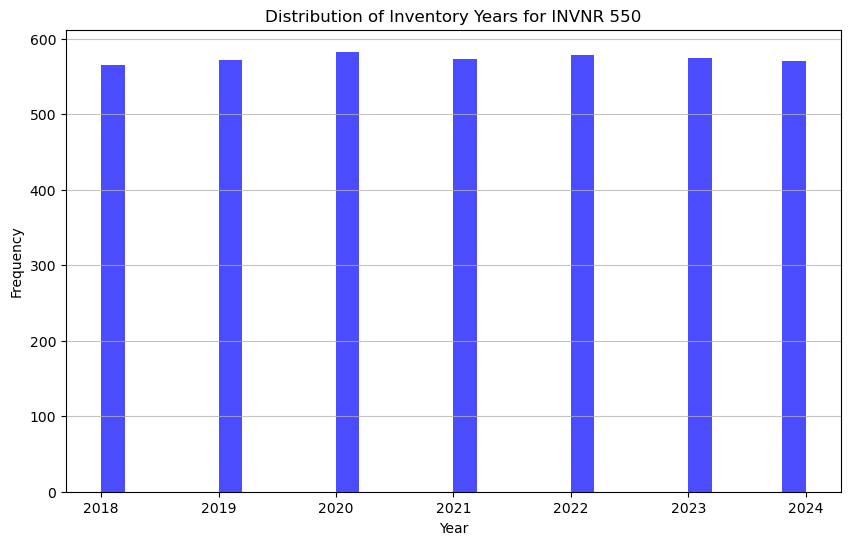

In [30]:
#plot NFI_df[NFI_df['INVNR']== 550]['INVYR']
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(NFI_df[NFI_df['INVNR']== 550]['INVYR'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Inventory Years for INVNR 550')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [31]:
import pandas as pd
import numpy as np


# --- Step 1: Isolate the last records to be extrapolated ---
# We will extrapolate from the final recorded inventory for each plot (INVNR=550)
last_records_df = NFI_df[NFI_df['INVNR'] == 550].copy()# the plots that dont have a final inventory (INVNR=550) will not be extrapolated
print(f"Found {len(last_records_df)} plots with a final inventory (INVNR=550) to extrapolate.")
print(f"Starting years for extrapolation: {sorted(last_records_df['INVYR'].unique())}")


# --- Step 2: Define the extrapolation rules ---
extrapolation_rules = {
    # start_year: [list of time steps in years]
    2018: [11] + [10] * 7,
    2019: [10] * 8,
    2020: [9] + [10] * 7,
    2021: [9] * 2 + [10] * 6,
    2022: [9] * 3 + [10] * 5,
    2023: [9] * 4 + [10] * 4,
    2024: [9] * 5 + [10] * 3
}


# --- Step 3: Generate the new, extrapolated rows ---
new_rows = []
static_cols = ['CLNR', 'BEWIRTINT1','NAISHSTKOMB', 'ASPECT25', 'SLOPE25', 'PH', 'Z25', 'X', 'Y']

for _, last_record in last_records_df.iterrows():
    start_year = last_record['INVYR']
    
    if start_year not in extrapolation_rules:
        print(f"Warning: No extrapolation rules defined for start year {start_year}. Skipping this record.")
        continue

    time_steps = extrapolation_rules[start_year]
    current_year = last_record['INVYR']
    current_invnr = last_record['INVNR']
    
    for step in time_steps:
        # Calculate new dynamic data
        current_year += step
        current_invnr += 100
        
        # Create the new row
        new_row = {
            'INVYR': int(current_year),
            'INVNR': int(current_invnr),
        }
        
        # Copy static data
        for col in static_cols:
            new_row[col] = last_record[col]
            
        # Set all other dynamic/target columns to NaN as they are unknown
        for col in ['BASFPH',  'HW', 'SW', 'HWSW_prop']:
            new_row[col] = np.nan
        
        new_rows.append(new_row)

extrapolated_df = pd.DataFrame(new_rows)
print(f"\nSuccessfully generated {len(extrapolated_df)} new rows for future inventories.")


# --- Step 4: Combine original and extrapolated data ---
NFI_df_extrapolated = pd.concat([NFI_df, extrapolated_df], ignore_index=True, sort=False)

# Sort the final dataframe by plot and year
NFI_df_extrapolated.sort_values(by=['CLNR', 'INVYR'], inplace=True)
NFI_df_extrapolated.reset_index(drop=True, inplace=True)


# --- Step 5: Recalculate 'next' columns and time differences ---
print("\nRecalculating 'next inventory' columns")

# Drop ALL old columns and difference columns
columns_to_recalculate = [
    'BASFPH_next_INVNR', 
    'BASFPH_difference', 
    'HWSW_prop_next_INVNR', 
    'Time_Diff_years'
]
NFI_df_extrapolated.drop(columns=columns_to_recalculate, inplace=True, errors='ignore')

# a) Create the "next value" series for all relevant columns using .shift(-1)
next_invyr = NFI_df_extrapolated.groupby('CLNR')['INVYR'].shift(-1)
next_basfph = NFI_df_extrapolated.groupby('CLNR')['BASFPH'].shift(-1)
next_hwsw_prop = NFI_df_extrapolated.groupby('CLNR')['HWSW_prop'].shift(-1)

# b) Assign these new "next" series to the DataFrame
NFI_df_extrapolated['Time_Diff_years'] = (next_invyr - NFI_df_extrapolated['INVYR']).astype('Int64')
NFI_df_extrapolated['BASFPH_next_INVNR'] = next_basfph
NFI_df_extrapolated['HWSW_prop_next_INVNR'] = next_hwsw_prop

# c) Recalculate the difference column based on the newly created columns
NFI_df_extrapolated['BASFPH_difference'] = NFI_df_extrapolated['BASFPH'] - NFI_df_extrapolated['BASFPH_next_INVNR']

print("All 'next' columns have been successfully recalculated.")


# --- Final Verification ---
print(f"\nOriginal DataFrame shape: {NFI_df.shape}")
print(f"Final Extrapolated DataFrame shape: {NFI_df_extrapolated.shape}")

print("\n--- Verification for a sample plot (CLNR=26) which ended in 2018 ---")
# This CLNR had its last real inventory in 2018, so it should now have future rows.
# Note the integer Time_Diff_years values.
print(NFI_df_extrapolated[NFI_df_extrapolated['CLNR'] == 26][['CLNR', 'INVYR', 'INVNR', 'Time_Diff_years', 'HWSW_prop_next_INVNR']])

Found 4019 plots with a final inventory (INVNR=550) to extrapolate.
Starting years for extrapolation: [np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]

Successfully generated 32152 new rows for future inventories.

Recalculating 'next inventory' columns
All 'next' columns have been successfully recalculated.

Original DataFrame shape: (19720, 21)
Final Extrapolated DataFrame shape: (51872, 21)

--- Verification for a sample plot (CLNR=26) which ended in 2018 ---
    CLNR  INVYR  INVNR  Time_Diff_years  HWSW_prop_next_INVNR
13    26   1984    150               10              0.541733
14    26   1994    250               11              1.000000
15    26   2005    350                5              1.000000
16    26   2010    450                8              1.000000
17    26   2018    550               11                   NaN
18    26   2029    650               10                   NaN
19    26   2039    750             

In [32]:
output_file_path = "../data/preprocessed/nfi/nfi_processed_data.csv"

NFI_df_extrapolated.to_csv(output_file_path, index=False, encoding='utf-8')
        
print(f"\nDataFrame NFI_df successfully saved to: {output_file_path}")
print(f"Number of rows saved: {len(NFI_df_extrapolated)}")
print(f"Number of columns saved: {len(NFI_df_extrapolated.columns)}")


DataFrame NFI_df successfully saved to: ../data/preprocessed/nfi/nfi_processed_data.csv
Number of rows saved: 51872
Number of columns saved: 21


In [33]:
#drop na values in NFI_df_extrapolated
NFI_df_extrapolated = NFI_df_extrapolated.dropna(subset=['BASFPH', 'HWSW_prop', 'BASFPH_next_INVNR', 'HWSW_prop_next_INVNR'])
NFI_df_extrapolated.shape

(15640, 21)

In [34]:
import xarray as xr
import numpy as np
import os

# --- Configuration ---
# 1. Set the path to your NetCDF file
file_path = os.path.expanduser('../data/raw/ch2018/CH2018_pr_KNMI-RACMO_ECEARTH_EUR44_RCP85_QMgrid_1981-2099.nc')

# 2. Define how many coordinate values to display
num_lon_to_show = 5
num_lat_to_show = 5
# ---------------------


def inspect_netcdf_coordinates(filepath, num_lon, num_lat):
    """
    Opens a NetCDF file and prints the unrounded values of its 
    coordinates.
    """
    print(f"--- Inspecting NetCDF Coordinates ---")
    print(f"File: {filepath}\n")

    # Check if the file exists
    if not os.path.exists(filepath):
        print(f"ERROR: File not found at the specified path.")
        print("Please make sure the path is correct.")
        return

    try:
        # Open the dataset using xarray
        with xr.open_dataset(filepath) as ds:
            
            # Print a summary of the dataset (useful for context)
            print("🔍 Dataset Summary:")
            print(ds)
            print("-" * 30)

            # --- Identify Coordinate and Dimension Names ---
            # From your output, we know the relevant coordinates are 'lon', 'lat', and 'time'.
            # These are also the names of the dimensions in this case.
            lon_dim = 'lon'
            lat_dim = 'lat'
            time_dim = 'time'

            # --- Configure NumPy for high-precision printing ---
            np.set_printoptions(precision=15, suppress=True)

            # --- 1. Get and Print Longitude Values ---
            if lon_dim in ds.coords:
                print(f"🔬 Unrounded Longitude Values (first {num_lon}):")
                # Select the first few longitude coordinates by index
                lon_subset = ds[lon_dim].isel({lon_dim: slice(0, num_lon)})
                # Print the raw NumPy array values
                print(lon_subset.values)
                print() # Add a blank line for readability
            else:
                print(f"Warning: Longitude coordinate '{lon_dim}' not found.")

            # --- 2. Get and Print Latitude Values ---
            if lat_dim in ds.coords:
                print(f"🔬 Unrounded Latitude Values (first {num_lat}):")
                # Select the first few latitude coordinates by index
                lat_subset = ds[lat_dim].isel({lat_dim: slice(0, num_lat)})
                # Print the raw NumPy array values
                print(lat_subset.values)
                print()
            else:
                print(f"Warning: Latitude coordinate '{lat_dim}' not found.")

            # --- 3. Get and Print the First Time Value ---
            if time_dim in ds.coords:
                print(f"First Time Step Value:")
                # Select the very first time coordinate by index
                first_time = ds[time_dim].isel({time_dim: 0})
                # Print its value. datetime64 objects print nicely by default.
                print(first_time.values)
                print()
            else:
                print(f"Warning: Time coordinate '{time_dim}' not found.")

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# --- Run the function ---
if __name__ == "__main__":
    inspect_netcdf_coordinates(
        filepath=file_path,
        num_lon=num_lon_to_show,
        num_lat=num_lat_to_show
    )

--- Inspecting NetCDF Coordinates ---
File: ../data/raw/ch2018/CH2018_pr_KNMI-RACMO_ECEARTH_EUR44_RCP85_QMgrid_1981-2099.nc

🔍 Dataset Summary:
<xarray.Dataset> Size: 4GB
Dimensions:  (lon: 220, lat: 101, time: 43464)
Coordinates:
  * lon      (lon) float64 2kB 5.938 5.958 5.979 6.0 ... 10.44 10.46 10.48 10.5
  * lat      (lat) float64 808B 45.77 45.79 45.81 45.83 ... 47.81 47.83 47.85
  * time     (time) datetime64[ns] 348kB 1981-01-01T12:00:00 ... 2099-12-31T1...
Data variables:
    pr       (time, lat, lon) float32 4GB ...
Attributes: (12/17)
    title:            CH2018 bias-corrected and downscaled data
    project:          CH2018 - New Climate Scenarios for Switzerland (http://...
    institution:      The CH2018 Consortium (MeteoSwiss, ETH Zurich, C2SM, Un...
    creator_name:     Sven Kotlarski (MeteoSwiss), sven.kotlarski@meteoswiss.ch
    contact:          klimaszenarien@meteoschweiz.ch
    license:          https://creativecommons.org/licenses/by/4.0
    ...               .

--- Loading and Preparing NFI Data ---
NFI data prepared. gdf_nfi_for_sjoin shape: (51872, 3), CRS: EPSG:21781

--- Loading Sample CH2018 Data for Coordinates ---
Using sample CH2018 file: ../data/preprocessed/ch2018/CH2018_ensemble_mean_pr_RCP26.csv
Loaded 22220 unique CH2018 coordinates (EPSG:4326).
CH2018 coordinates transformed to CRS: EPSG:21781

--- Finding Closest CH2018 Coordinates for NFI Points ---

--- NFI Data with Original NFI Coords (EPSG:21781) and Closest CH2018 Coords (EPSG:4326 & EPSG:21781) ---
   CLNR  INVNR               geometry  distance_to_CH2018_m  \
0     6    150  POINT (686000 295000)            940.526952   
1     6    250  POINT (686000 295000)            940.526952   
2     6    350  POINT (686000 295000)            940.526952   
3     6    450  POINT (686000 295000)            940.526952   
4     6    550  POINT (686000 295000)            940.526952   

   closest_CH2018_X_21781  closest_CH2018_Y_21781  closest_CH2018_lon_4326  \
0           685772.49451

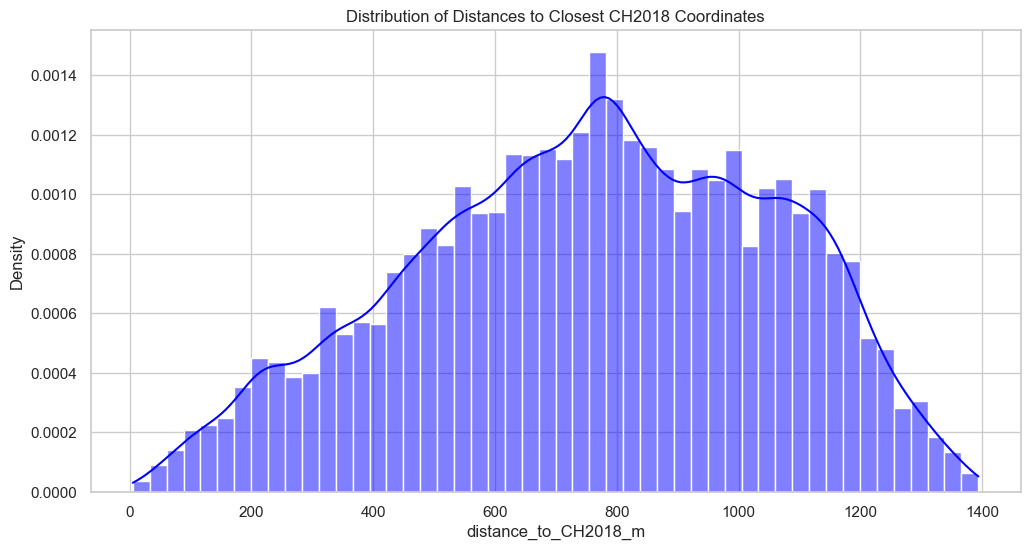

In [35]:
#finding closest CH2018 coordinates to NFI coordinates

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os

# --- Configuration ---
nfi_file_path = "../data/preprocessed/nfi/nfi_processed_data.csv"
sample_ch2018_file = '../data/preprocessed/ch2018/CH2018_ensemble_mean_pr_RCP26.csv'
output_file_path = "../data/preprocessed/NFI_CH2018_closest_coords.csv"

NFI_CRS = "EPSG:21781"  # LV03
CH2018_ORIGINAL_CRS = "EPSG:4326" # WGS84 for lat/lon

# --- 1. Load and Prepare NFI Data ---
print("--- Loading and Preparing NFI Data ---")
nfi_df_initial = pd.read_csv(nfi_file_path)
gdf_nfi_full = gpd.GeoDataFrame(
    nfi_df_initial,
    geometry=gpd.points_from_xy(nfi_df_initial['X'].astype(float), nfi_df_initial['Y'].astype(float)),
    crs=NFI_CRS
)

nfi_identifier_cols = ['CLNR', 'INVNR']
gdf_nfi_for_sjoin = gdf_nfi_full[nfi_identifier_cols + ['geometry']].copy() #
print(f"NFI data prepared. gdf_nfi_for_sjoin shape: {gdf_nfi_for_sjoin.shape}, CRS: {gdf_nfi_for_sjoin.crs}")

# --- 2. Load Sample CH2018 File and Prepare Coordinates in BOTH CRSs ---
print("\n--- Loading Sample CH2018 Data for Coordinates ---")


print(f"Using sample CH2018 file: {sample_ch2018_file}")


lon_col_name = 'lon'
lat_col_name = 'lat'

df_ch2018_sample_coords = pd.read_csv(sample_ch2018_file, usecols=[lon_col_name, lat_col_name])
df_ch2018_sample_coords.drop_duplicates(inplace=True)
df_ch2018_sample_coords.reset_index(drop=True, inplace=True) # Ensure clean index for alignment



# CH2018 coordinates in their original CRS (EPSG:4326)
gdf_ch2018_sample_4326 = gpd.GeoDataFrame(
    df_ch2018_sample_coords.copy(), # Use a copy to avoid modifying df_ch2018_sample_coords if needed elsewhere
    geometry=gpd.points_from_xy(df_ch2018_sample_coords[lon_col_name], df_ch2018_sample_coords[lat_col_name]),
    crs=CH2018_ORIGINAL_CRS
)
# Add original lon/lat columns explicitly to this GeoDataFrame for easy access later
gdf_ch2018_sample_4326['CH2018_lon_4326'] = gdf_ch2018_sample_4326.geometry.x
gdf_ch2018_sample_4326['CH2018_lat_4326'] = gdf_ch2018_sample_4326.geometry.y
print(f"Loaded {len(gdf_ch2018_sample_4326)} unique CH2018 coordinates (EPSG:4326).")

# CH2018 coordinates transformed to NFI CRS (EPSG:21781) for spatial join
gdf_ch2018_sample_21781 = gdf_ch2018_sample_4326.to_crs(NFI_CRS)
# Add transformed X/Y columns explicitly to this GeoDataFrame
gdf_ch2018_sample_21781['CH2018_X_21781'] = gdf_ch2018_sample_21781.geometry.x
gdf_ch2018_sample_21781['CH2018_Y_21781'] = gdf_ch2018_sample_21781.geometry.y
print(f"CH2018 coordinates transformed to CRS: {gdf_ch2018_sample_21781.crs}")


# --- 3. Find Closest CH2018 Point for each NFI Point ---
print("\n--- Finding Closest CH2018 Coordinates for NFI Points ---")

# Perform the spatial join using the NFI CRS for both GeoDataFrames
# We only need 'index_right' and 'distance' from this join.
# The 'geometry' from gdf_ch2018_sample_21781 will be temporarily added, but we'll replace it.
gdf_nfi_with_closest_info = gpd.sjoin_nearest(
    gdf_nfi_for_sjoin,
    gdf_ch2018_sample_21781[['geometry', 'CH2018_X_21781', 'CH2018_Y_21781','CH2018_lon_4326','CH2018_lat_4326']], # Join only necessary cols from right, 
    distance_col="distance_to_CH2018_m" # Distance will be in meters (units of NFI_CRS)
)


# Add the distance to the original NFI dataframe
gdf_nfi_for_sjoin['distance_to_CH2018_m'] = gdf_nfi_with_closest_info['distance_to_CH2018_m']

# Add the CH2018 coordinates in EPSG:21781 and EPSG:4326 to the NFI GeoDataFrame
# These come directly from the join as it used gdf_ch2018_sample_21781
gdf_nfi_for_sjoin['closest_CH2018_X_21781'] = gdf_nfi_with_closest_info['CH2018_X_21781']
gdf_nfi_for_sjoin['closest_CH2018_Y_21781'] = gdf_nfi_with_closest_info['CH2018_Y_21781']
gdf_nfi_for_sjoin['closest_CH2018_lon_4326'] = gdf_nfi_with_closest_info['CH2018_lon_4326']
gdf_nfi_for_sjoin['closest_CH2018_lat_4326'] = gdf_nfi_with_closest_info['CH2018_lat_4326']




print("\n--- NFI Data with Original NFI Coords (EPSG:21781) and Closest CH2018 Coords (EPSG:4326 & EPSG:21781) ---")
print(gdf_nfi_for_sjoin.head())
print(f"Shape of updated gdf_nfi_for_sjoin: {gdf_nfi_for_sjoin.shape}")
print(f"Columns: {gdf_nfi_for_sjoin.columns.tolist()}")
print(f"NFI Geometry CRS: {gdf_nfi_for_sjoin.crs}") # Should still be NFI_CRS

# plot the distribion of gdf_nfi_for_sjoin["distance_to_CH2018_m"] to see if there are any outliers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
# Plotting the distribution of distances
sns.histplot(gdf_nfi_for_sjoin["distance_to_CH2018_m"], bins=50, kde=True, color='blue', stat='density')
plt.title("Distribution of Distances to Closest CH2018 Coordinates")  


print(f"Columns: {gdf_nfi_for_sjoin.columns.tolist()}")
# join nfi_df_initial with this two columns closest_CH2018_lon_4326 and closest_CH2018_lat_4326 of gdf_nfi_for_sjoin, using join
nfi_df_closest_grid = nfi_df_initial.merge(
    gdf_nfi_for_sjoin[['CLNR', 'INVNR', 'closest_CH2018_lon_4326', 'closest_CH2018_lat_4326',"distance_to_CH2018_m"]],
    on=['CLNR', 'INVNR'],
    how='left'
)


#nfi_df_closest_grid.drop_duplicates(subset=['CLNR'], inplace=True)

print("\n--- Final NFI Data with Closest CH2018 Coordinates ---")
print(nfi_df_closest_grid.head())

nfi_df_closest_grid.to_csv(output_file_path, index=False, encoding='utf-8', float_format='%.4f')

print(f"Using sample CH2018 file: {'../data/preprocessed/NFI_CH2018_closest_coords.csv'}")

print( nfi_df_closest_grid['CLNR'].nunique())